In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression



In [2]:
df = pd.read_csv('olympic_analysis_data.csv')
print(df.head())

  country_name country_code_2 country_code_3  year  hosting_status  \
0          USA             US            USA  2004               0   
1       Russia             RU            RUS  2004               0   
2        China             CN            CHN  2004               0   
3      Germany             DE            GER  2004               0   
4    Australia             AU            AUS  2004               0   

   population  gdp_per_capita  life_expectancy  pop_20_39_percent  \
0   293000000           54200             77.7               28.1   
1   145000000           19000             65.5               29.5   
2  1300000000            5070             72.5               34.5   
3    82100000           44200             79.3               26.8   
4    20000000           43100             80.9               28.6   

   urban_population_percent   bmi_mean  area_sq_km  democracy_score  \
0                      79.8  27.027586     9630000               10   
1                     

In [3]:
df = df.drop(['country_name', 'country_code_2', 'country_code_3', 'slug_game'], axis=1)

In [4]:
df = df.drop(['pop_20_39_percent'], axis=1)
#df = df.drop(['urban_population_percent'], axis=1) #keep this
df = df.drop(['bmi_mean'], axis=1)
#df = df.drop(['life_expectancy'], axis=1)

In [5]:
df_test = df[df['year'] == 2020]
df = df[df['year'] < 2020]
X = df.drop(columns=['total_medal_count'])  # Features
y = df['total_medal_count']  # Target variable
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)


X_test = df_test.drop(['total_medal_count'], axis=1)
y_test = df_test['total_medal_count']


In [6]:
rf = RandomForestRegressor(n_estimators=15, random_state=0, oob_score=True)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=15, oob_score=True, random_state=0)

In [7]:
y_pred = rf.predict(X_validation)

mse = mean_squared_error(y_validation,y_pred )
print(f'Mean Squared Error Validation: {mse}')

r2 = r2_score(y_validation, y_pred)
print(f'R-squared Validation: {r2}')


Mean Squared Error Validation: 95.7133781033781
R-squared Validation: 0.8164192215666497


In [8]:
'''
# Assuming regressor is your trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = rf.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=df.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()'''

'\n# Assuming regressor is your trained Random Forest model\n# Pick one tree from the forest, e.g., the first tree (index 0)\ntree_to_plot = rf.estimators_[0]\n\n# Plot the decision tree\nplt.figure(figsize=(20, 10))\nplot_tree(tree_to_plot, feature_names=df.columns.tolist(), filled=True, rounded=True, fontsize=10)\nplt.title("Decision Tree from Random Forest")\nplt.show()'

In [9]:
y_testpred = rf.predict(X_test)

mse = mean_squared_error(y_test,y_testpred )
print(f'Mean Squared Error - Test: {mse}')

r2 = r2_score(y_test,y_testpred)
print(f'R-squared - Test: {r2}')

Mean Squared Error - Test: 38.81751004016064
R-squared - Test: 0.9191257361425555


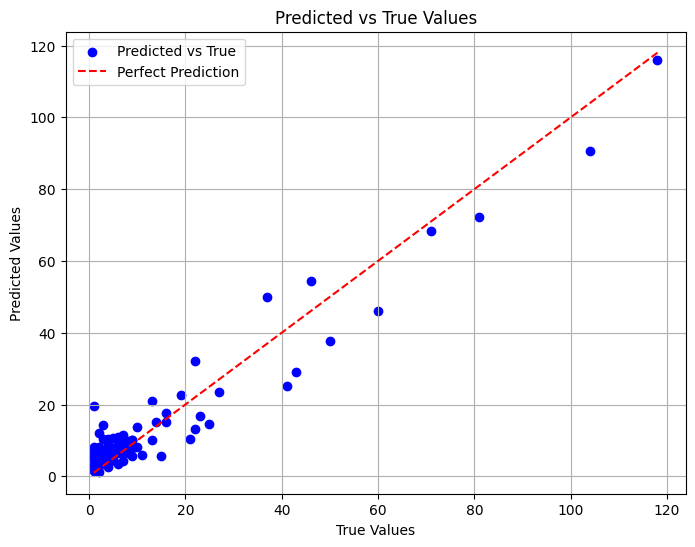

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_testpred, color='blue', label='Predicted vs True')

# Adding a diagonal line representing a perfect prediction
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

#plt.xscale('log')
#plt.yscale('log')
plt.title('Predicted vs True Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
'''pd.DataFrame({'actual': y_test, 'predicted': y_testpred}).to_csv('predictions.csv', index=False)
print(X_test)'''

"pd.DataFrame({'actual': y_test, 'predicted': y_testpred}).to_csv('predictions.csv', index=False)\nprint(X_test)"

In [12]:
#Linear Regression

regr = LinearRegression()
regr.fit(X_train, y_train)

y_pred_lr = regr.predict(X_validation)

mse_lr = mean_squared_error(y_validation, y_pred_lr)
r2_val_lr = r2_score(y_validation, y_pred_lr)

print('Mean Squared Error - Validation: ', mse_lr)    # print the training error
print('The R Squatred -Validation : ', r2_val_lr)    # print the R^2
print("Coefficients w1 = ", regr.coef_)   # print the learnt w1
print("w0 = ", regr.intercept_) # print the learnt w0

y_pred_lr_test = regr.predict(X_test)

mse_lr_test = mean_squared_error(y_test, y_pred_lr_test)
r2_val_lr_test = r2_score(y_test, y_pred_lr_test)

print('Mean Squared Error - Test: ', mse_lr_test)    # print the training error
print('The R Squatred - Test: ', r2_val_lr_test)    # print the R^2


Mean Squared Error - Validation:  335.15059170353686
The R Squatred -Validation :  0.35717234375659634
Coefficients w1 =  [-9.29740701e-02  1.58967160e+01  2.24446755e-08  1.79195483e-04
  5.75588686e-01 -2.97910413e-02  2.96429095e-06 -1.39779236e-01]
w0 =  150.1945037653971
Mean Squared Error - Test:  221.0034516540525
The R Squatred - Test:  0.5395507995236202


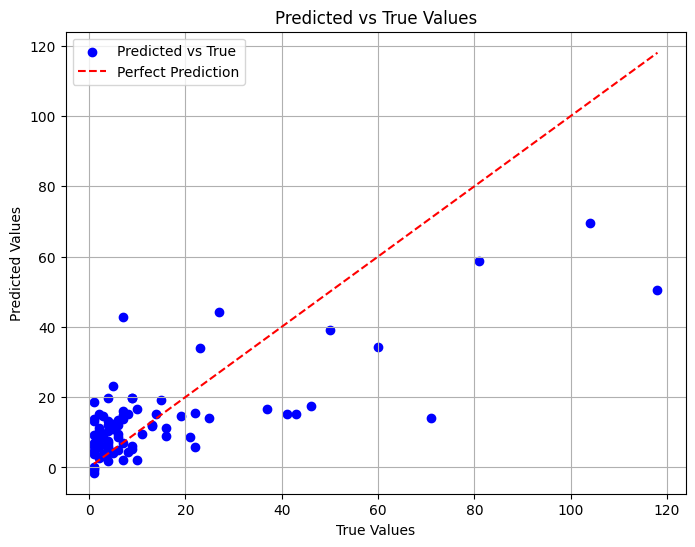

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr_test, color='blue', label='Predicted vs True')

# Adding a diagonal line representing a perfect prediction
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

#plt.xscale('log')
#plt.yscale('log')
plt.title('Predicted vs True Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()